In [19]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [23]:
#df = pd.read_csv(os.path.join(".", "Resources", "ufo-sightings.csv"))
url = 'https://raw.githubusercontent.com/lucyhohler/Final-Project---Data-Analytics/master/Resources/ufo-sightings.csv'
df = pd.read_csv(url, sep=",", na_filter=False)
df.head(20)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,season,time of day,part of day
0,1/10/1947 20:00,conroe,tx,us,other,4,3 to4 sec.,The date was early 1947 before Arnold&#39s &qu...,4/16/2005,30.311667,-95.455833,1,Winter,8:00 PM,EVENING
1,1/10/1959 18:30,south san francisco,ca,us,disk,120,2 minutes,Its was approximately 6:30pm&#44 I was sitting...,4/27/2004,37.654722,-122.406667,1,Winter,6:30 PM,EVENING
2,1/10/1964 20:00,el cerrito (over old berkeley dump),ca,us,fireball,120,2 minutes,bal of fire in the sky no reported air crashes...,5/15/2006,37.915833,-122.310556,1,Winter,8:00 PM,EVENING
3,1/10/1980 0:00,exeter,nh,us,disk,7800,10min to 2hrs,saw what appeared as very bright star&#44 some...,2/18/2001,42.981389,-70.948333,1,Winter,12:00 AM,NIGHT
4,1/10/1981 20:30,glendora,ca,us,unknown,60,1 minute,On a very foggy night in 1981 I was illuminate...,2/18/2001,34.136111,-117.864444,1,Winter,8:30 PM,EVENING
5,1/10/1983 20:00,crosby,tx,us,cylinder,300,< 5 min,Several unexplained incidents reported by fami...,1/17/2004,29.911667,-95.061944,1,Winter,8:00 PM,EVENING
6,1/10/1987 17:00,el centro (approaching from west),ca,us,sphere,300,5 minutes,Two large&#44 apparently sperical objects&#44 ...,12/16/1999,32.791944,-115.562222,1,Winter,5:00 PM,EVENING
7,1/10/1988 22:10,williamsfield,il,us,unknown,1620,27 minutes,A dull yellow light&#44 low off the ground and...,8/7/2011,40.922500,-90.014444,1,Winter,10:10 PM,NIGHT
8,1/10/1989 23:00,jackson,nj,us,fireball,600,10...mins,I wonder now why we both didn&#39t make a big ...,2/22/2002,39.776389,-74.862778,1,Winter,11:00 PM,NIGHT
9,1/10/1989 23:30,san diego,ca,us,light,15,0:15,Intentional formation of lights,12/19/2003,32.715278,-117.156389,1,Winter,11:30 PM,NIGHT


In [24]:
df = df.drop(columns=["datetime", "city", "country", "duration (seconds)", "duration (hours/min)", "comments", "date posted", "latitude", "longitude ", "month", "time of day"])
df.head()

,state,shape,season,part of day
0,tx,other,Winter,EVENING
1,ca,disk,Winter,EVENING
2,ca,fireball,Winter,EVENING
3,nh,disk,Winter,NIGHT
4,ca,unknown,Winter,EVENING


In [25]:
df['outcome'] = '1'
df.head()

,state,shape,season,part of day,outcome
0,tx,other,Winter,EVENING,1
1,ca,disk,Winter,EVENING,1
2,ca,fireball,Winter,EVENING,1
3,nh,disk,Winter,NIGHT,1
4,ca,unknown,Winter,EVENING,1


In [27]:
import math

for index, row in df.iterrows():
    outcome = '1' 
    #print(row['shape'])
    if not row['shape'] or row['shape'] == 'other' or row['shape'] == 'unknown':
        outcome = '0'
    row['outcome'] = outcome

df.head(20)

,state,shape,season,part of day,outcome
0,tx,other,Winter,EVENING,0
1,ca,disk,Winter,EVENING,1
2,ca,fireball,Winter,EVENING,1
3,nh,disk,Winter,NIGHT,1
4,ca,unknown,Winter,EVENING,0
5,tx,cylinder,Winter,EVENING,1
6,ca,sphere,Winter,EVENING,1
7,il,unknown,Winter,NIGHT,0
8,nj,fireball,Winter,NIGHT,1
9,ca,light,Winter,NIGHT,1


In [28]:
target = df["outcome"]
target.head()

0    0
1    1
2    1
3    1
4    0
Name: outcome, dtype: object

In [29]:
data = df.drop("outcome", axis=1)
feature_names = data.columns
data.head()

,state,shape,season,part of day
0,tx,other,Winter,EVENING
1,ca,disk,Winter,EVENING
2,ca,fireball,Winter,EVENING
3,nh,disk,Winter,NIGHT
4,ca,unknown,Winter,EVENING


In [30]:
from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.998
k: 3, Train/Test Score: 0.999/0.998
k: 5, Train/Test Score: 0.999/0.998
k: 7, Train/Test Score: 0.998/0.997
k: 9, Train/Test Score: 0.997/0.996
k: 11, Train/Test Score: 0.997/0.995
k: 13, Train/Test Score: 0.996/0.995
k: 15, Train/Test Score: 0.995/0.994
k: 17, Train/Test Score: 0.995/0.993
k: 19, Train/Test Score: 0.994/0.992
k: 21, Train/Test Score: 0.993/0.992
k: 23, Train/Test Score: 0.993/0.991
k: 25, Train/Test Score: 0.991/0.989
k: 27, Train/Test Score: 0.991/0.989
k: 29, Train/Test Score: 0.990/0.988
k: 31, Train/Test Score: 0.989/0.987
k: 33, Train/Test Score: 0.989/0.986
k: 35, Train/Test Score: 0.988/0.985
k: 37, Train/Test Score: 0.986/0.983
k: 39, Train/Test Score: 0.985/0.982
k: 41, Train/Test Score: 0.985/0.982
k: 43, Train/Test Score: 0.983/0.980
k: 45, Train/Test Score: 0.980/0.976
k: 47, Train/Test Score: 0.981/0.977
k: 49, Train/Test Score: 0.978/0.974
k: 51, Train/Test Score: 0.978/0.974
k: 53, Train/Test Score: 0.976/0.972
k: 55,

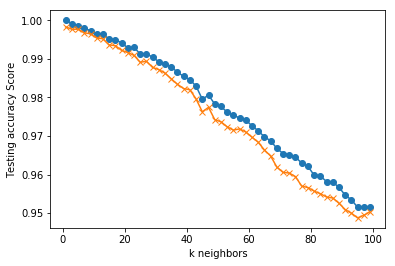

In [35]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [37]:
# Note that k: 99 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=99)
knn.fit(X_train, y_train)
print('k=99 Test Acc: %.3f' % knn.score(X_test, y_test))

k=99 Test Acc: 0.950
